In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import os

In [ ]:
os.makedirs("my_folder", exist_ok=True)

In [ ]:
df = pd.read_csv("sample_data/step2_imputed.csv")
print(df.head())
print(df.shape)

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21  28.1     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
(5110, 11)


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", categorical_cols)


Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
for col in categorical_cols:
    print(f"{col} unique values:", df[col].unique())

gender unique values: ['Male' 'Female' 'Other']
ever_married unique values: ['Yes' 'No']
work_type unique values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type unique values: ['Urban' 'Rural']
smoking_status unique values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
binary_cols = ['ever_married', 'Residence_type']
label_encoder = LabelEncoder()

In [ ]:
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(f"\nEncoded {col} :", df[col].head().values)


Encoded ever_married : [1 1 1 1 1]

Encoded Residence_type : [1 0 0 1 0]


In [ ]:
multi_cols = [
    'gender', 'work_type', 'smoking_status']


multi_cols = [col for col in multi_cols if col in df.columns]

df = pd.get_dummies(df, columns=multi_cols, prefix=multi_cols, drop_first=True, dtype=int)

print("\nEncoded DataFrame shape:", df.shape)
print("Encoded columns sample:")
print(df.head())


Encoded DataFrame shape: (5110, 17)
Encoded columns sample:
    age  hypertension  heart_disease  ever_married  Residence_type  \
0  67.0             0              1             1               1   
1  61.0             0              0             1               0   
2  80.0             0              1             1               0   
3  49.0             0              0             1               1   
4  79.0             1              0             1               0   

   avg_glucose_level   bmi  stroke  gender_Male  gender_Other  \
0             228.69  36.6       1            1             0   
1             202.21  28.1       1            0             0   
2             105.92  32.5       1            1             0   
3             171.23  34.4       1            0             0   
4             174.12  24.0       1            0             0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1          

/tmp/ipython-input-4008949881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ever_married', data=df, palette=['lightpink', 'lightblue'])


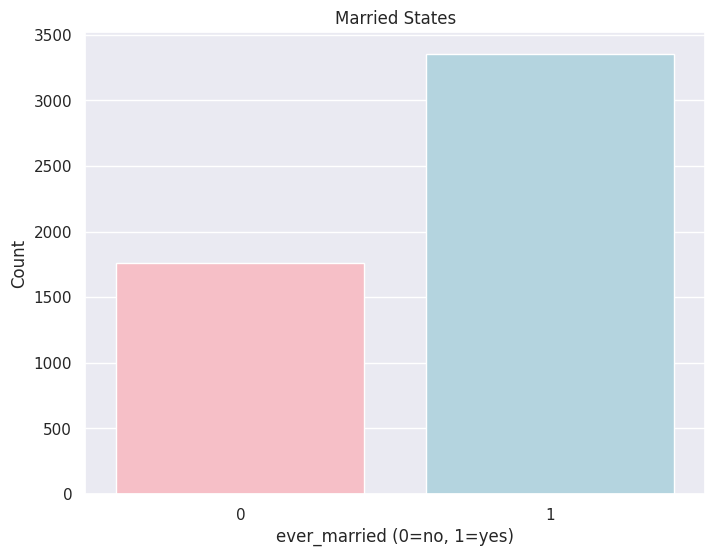

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='ever_married', data=df, palette=['lightpink', 'lightblue'])
plt.title('Married States')
plt.xlabel('ever_married (0=no, 1=yes)')
plt.ylabel('Count')

plt.savefig('my_folder',
            dpi=300, bbox_inches='tight')
plt.show()


plt.close()

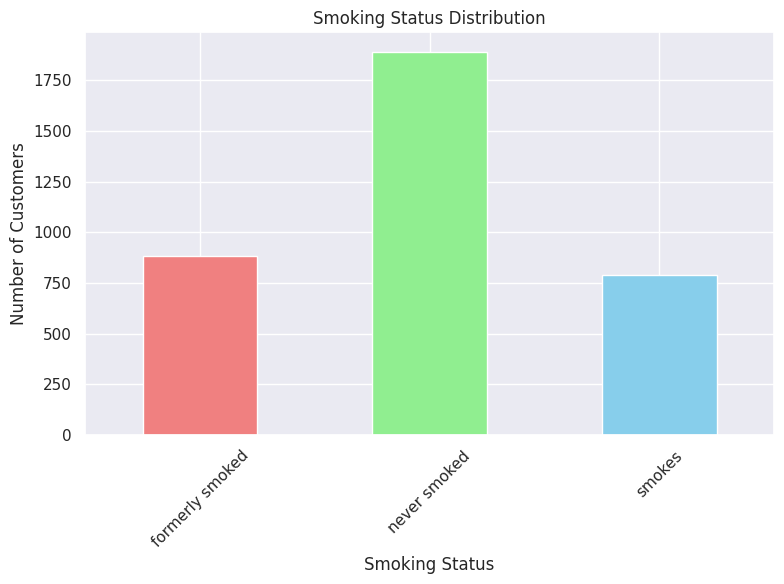

In [ ]:
smoking_status_cols = [col for col in df.columns if col.startswith('smoking_status_')]

smoking_status_counts = {}
for col in smoking_status_cols:
    smoking_status_counts[col.replace('smoking_status_', '')] = df[col].sum()

smoking_status_counts = pd.Series(smoking_status_counts)

plt.figure(figsize=(8, 6))
smoking_status_counts.plot(kind='bar', color=['lightcoral', 'lightgreen', 'skyblue', 'orange'])
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

save_path = 'my_folder/smoking_status_distribution.png'
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
os.makedirs("results", exist_ok=True)

In [ ]:
df.to_csv("results/step3_encoded.csv", index=False)